In [1]:
# Getting parent directory of current direc and adding into the system path
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.insert(0, parent_dir)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/home/am/Documents/Software Development/10_Academy Training/week2/Data/Copy of Week2_challenge_data_source(CSV).csv")

In [4]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [5]:
from scripts.user_experience_analysis import UserExperienceAnalyzer
user_experience = UserExperienceAnalyzer(df)

In [6]:
user_experience_aggregated = user_experience.aggregate_user_experience_data()

In [7]:
user_experience_aggregated.columns

Index(['MSISDN/Number', 'TCP Retransmission', 'RTT', 'Throughput',
       'Handset Type'],
      dtype='object')

In [8]:
user_experience_aggregated['TCP Retransmission'].describe()

count    1.068560e+05
mean     1.934938e+07
std      1.001774e+07
min      9.700000e+01
25%      1.291948e+07
50%      2.571697e+07
75%      2.571697e+07
max      5.620225e+07
Name: TCP Retransmission, dtype: float64

In [9]:
# top 10 bottom 10 and mode
results = user_experience.compute_top_bottom_frequent()

In [10]:
# Assuming 'results' is a dictionary where each key contains a dictionary with 'top_10', 'bottom_10', 'most_frequent'
for key, result in results.items():
    print(f"Stats for {key} User Experience Analysis Metrics:\n")
    for sub_key, sub_result in result.items():
        print(f"{sub_key}: {sub_result}")
    print("=======================================================================================================================\n\n")


Stats for TCP Retransmission User Experience Analysis Metrics:

Top_10 values: [56142569.0, 56144622.0, 56148826.0, 56164100.0, 56176107.0, 56185212.0, 56195532.0, 56199084.0, 56202254.0, 56212033.0]
Bottom_10 values: [86.0, 97.0, 106.0, 108.0, 113.0, 128.0, 129.0, 134.0, 134.0, 143.0]
Most_frequent values: [25716966.336391196, 25716966.336391203, 2660.0, 5320.0, 6650.0, 3990.0, 7980.0, 1873.0, 2648.0, 15960.0]


Stats for RTT User Experience Analysis Metrics:

Top_10 values: [128.5, 128.5, 128.5, 128.5, 128.5, 128.5, 128.5, 128.5, 128.5, 128.5]
Bottom_10 values: [0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.5, 3.0, 3.0]
Most_frequent values: [63.51244259624594, 63.51244259624592, 14.5, 19.5, 19.0, 20.0, 15.0, 14.0, 24.5, 20.5]


Stats for Throughput User Experience Analysis Metrics:

Top_10 values: [55708.0, 55713.0, 55715.0, 55718.0, 55721.0, 55724.0, 55726.0, 55731.0, 55732.0, 55732.0]
Bottom_10 values: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Most_frequent values: [15070.47457333

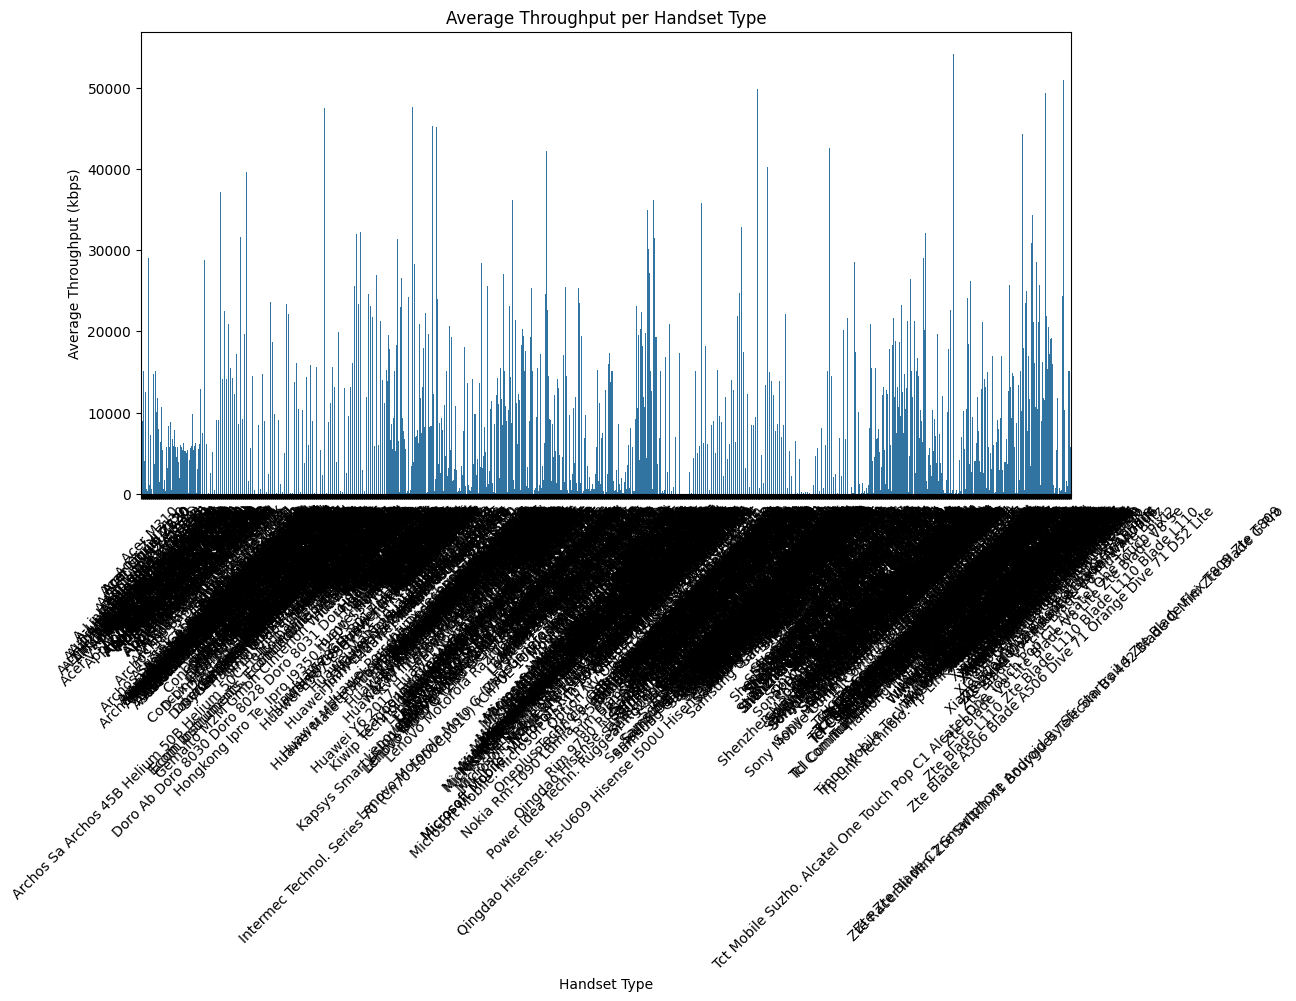

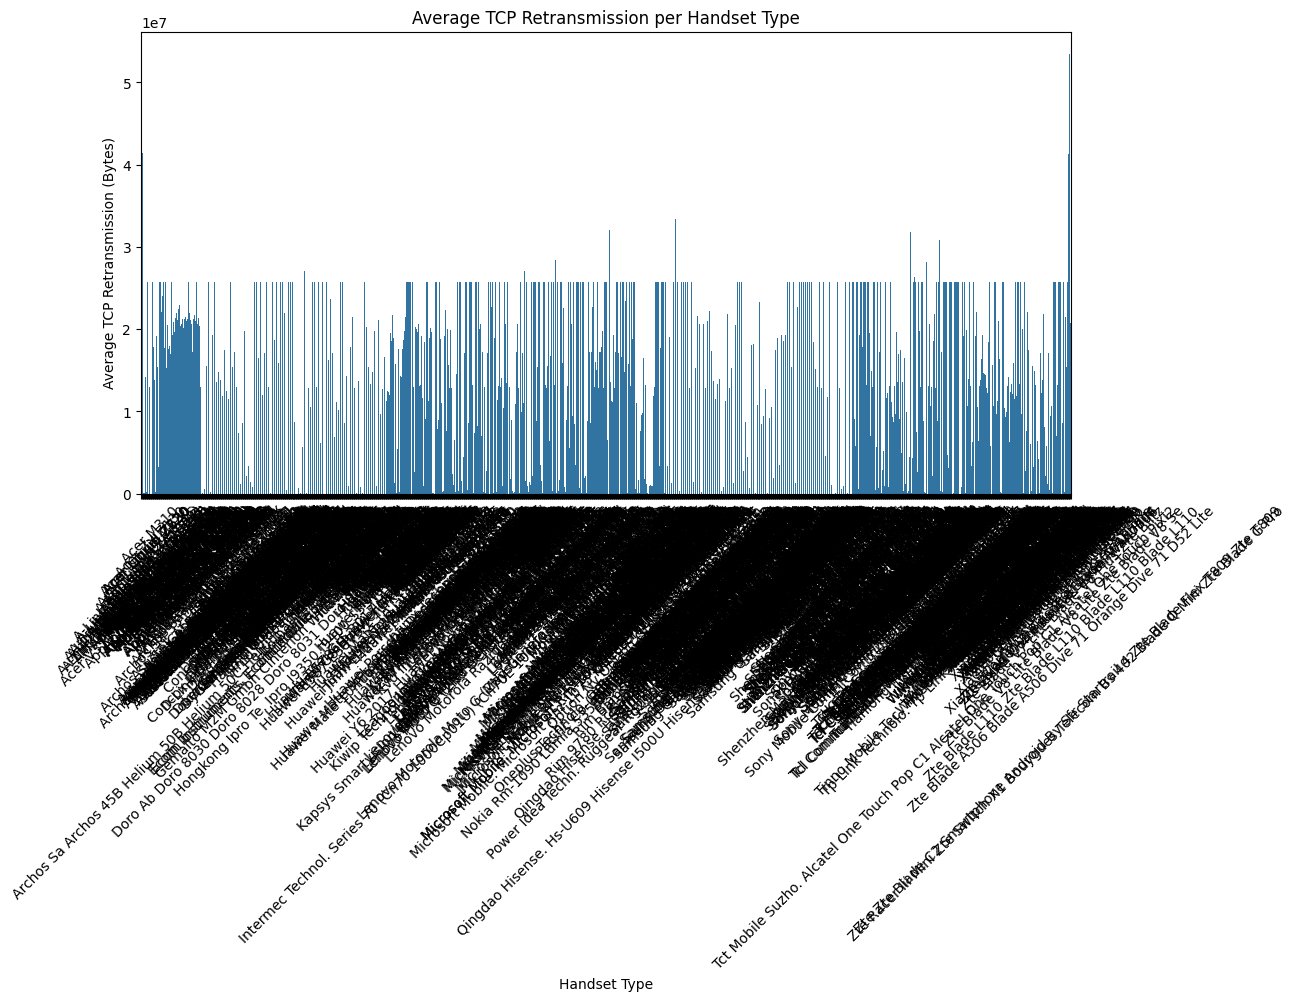

In [12]:
throughput_tcp_averages = user_experience.distribution_and_averages_per_handset()